# Feature Selection

This notebook includes:
* Feature Variance
* ANOVA
* Mutual Info
* Feature Importances
* Permutation Importances

## Imports and Global Settings

In [1]:
import time
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest

pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)
sns.set_theme(style="whitegrid")

## Helper Functions

In [2]:
def show_values_on_bars(axs, h_v="h", space=0.5):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 1.6
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Loading Data

In [3]:
start = time.perf_counter()

In [4]:
# EC2
# filepath_prefix = "/home/ubuntu/"
# Local

filepath_prefix = "/home/jeff/Documents/Data_Science_Projects/Yelp_Reviews/data/full_data/model_ready/"

In [5]:
train_records_to_load = 10000
test_records_to_load = 1000

In [6]:
datatypes = {'target_reg': 'int16',
 'review_stars': 'int16',
 'NB_prob': 'float32',
 'svm_pred': 'float32',
 'ft_prob': 'float32',
 'lda_t1': 'float32',
 'lda_t2': 'float32',
 'lda_t3': 'float32',
 'lda_t4': 'float32',
 'lda_t5': 'float32',
 'grade_level': 'float32',
 'polarity': 'float32',
 'subjectivity': 'float32',
 'word_cnt': 'int16',
 'character_cnt': 'int16',
 'num_cnt': 'int16',
 'uppercase_cnt': 'int16',
 '#@_cnt': 'int16',
 'sentence_cnt': 'int16',
 'lexicon_cnt': 'int16',
 'syllable_cnt': 'int16',
 'avg_word_len': 'float32',
 'token_cnt': 'int16',
 'stopword_cnt': 'int16',
 'stopword_pct': 'float32',
 'ent_cnt': 'int16',
 'ent_pct': 'float32',
 'pos_adj_pct': 'float32',
 'pos_adj_cnt': 'int16',
 'pos_adp_pct': 'float32',
 'pos_adp_cnt': 'int16',
 'pos_adv_pct': 'float32',
 'pos_adv_cnt': 'int16',
 'pos_aux_pct': 'float32',
 'pos_aux_cnt': 'int16',
 'pos_conj_pct': 'float32',
 'pos_conj_cnt': 'int16',
 'pos_det_pct': 'float32',
 'pos_det_cnt': 'int16',
 'pos_intj_pct': 'float32',
 'pos_intj_cnt': 'int16',
 'pos_noun_pct': 'float32',
 'pos_noun_cnt': 'int16',
 'pos_num_pct': 'float32',
 'pos_num_cnt': 'int16',
 'pos_part_pct': 'float32',
 'pos_part_cnt': 'int16',
 'pos_pron_pct': 'float32',
 'pos_pron_cnt': 'int16',
 'pos_propn_pct': 'float32',
 'pos_propn_cnt': 'int16',
 'pos_punct_pct': 'float32',
 'pos_punct_cnt': 'int16',
 'pos_sconj_pct': 'float32',
 'pos_sconj_cnt': 'int16',
 'pos_sym_pct': 'float32',
 'pos_sym_cnt': 'int16',
 'pos_verb_pct': 'float32',
 'pos_verb_cnt': 'int16',
 'pos_x_pct': 'float32',
 'pos_x_cnt': 'int16',
 'dep_root_pct': 'float32',
 'dep_root_cnt': 'int16',
 'dep_acl_pct': 'float32',
 'dep_acl_cnt': 'int16',
 'dep_acomp_pct': 'float32',
 'dep_acomp_cnt': 'int16',
 'dep_advcl_pct': 'float32',
 'dep_advcl_cnt': 'int16',
 'dep_advmod_pct': 'float32',
 'dep_advmod_cnt': 'int16',
 'dep_agent_pct': 'float32',
 'dep_agent_cnt': 'int16',
 'dep_amod_pct': 'float32',
 'dep_amod_cnt': 'int16',
 'dep_appos_pct': 'float32',
 'dep_appos_cnt': 'int16',
 'dep_attr_pct': 'float32',
 'dep_attr_cnt': 'int16',
 'dep_aux_pct': 'float32',
 'dep_aux_cnt': 'int16',
 'dep_auxpass_pct': 'float32',
 'dep_auxpass_cnt': 'int16',
 'dep_case_pct': 'float32',
 'dep_case_cnt': 'int16',
 'dep_cc_pct': 'float32',
 'dep_cc_cnt': 'int16',
 'dep_ccomp_pct': 'float32',
 'dep_ccomp_cnt': 'int16',
 'dep_compound_pct': 'float32',
 'dep_compound_cnt': 'int16',
 'dep_conj_pct': 'float32',
 'dep_conj_cnt': 'int16',
 'dep_csubj_pct': 'float32',
 'dep_csubj_cnt': 'int16',
 'dep_csubjpass_pct': 'float32',
 'dep_csubjpass_cnt': 'int16',
 'dep_dative_pct': 'float32',
 'dep_dative_cnt': 'int16',
 'dep_dep_pct': 'float32',
 'dep_dep_cnt': 'int16',
 'dep_det_pct': 'float32',
 'dep_det_cnt': 'int16',
 'dep_dobj_pct': 'float32',
 'dep_dobj_cnt': 'int16',
 'dep_expl_pct': 'float32',
 'dep_expl_cnt': 'int16',
 'dep_intj_pct': 'float32',
 'dep_intj_cnt': 'int16',
 'dep_mark_pct': 'float32',
 'dep_mark_cnt': 'int16',
 'dep_meta_pct': 'float32',
 'dep_meta_cnt': 'int16',
 'dep_neg_pct': 'float32',
 'dep_neg_cnt': 'int16',
 'dep_nmod_pct': 'float32',
 'dep_nmod_cnt': 'int16',
 'dep_npadvmod_pct': 'float32',
 'dep_npadvmod_cnt': 'int16',
 'dep_nsubj_pct': 'float32',
 'dep_nsubj_cnt': 'int16',
 'dep_nsubjpass_pct': 'float32',
 'dep_nsubjpass_cnt': 'int16',
 'dep_nummod_pct': 'float32',
 'dep_nummod_cnt': 'int16',
 'dep_oprd_pct': 'float32',
 'dep_oprd_cnt': 'int16',
 'dep_parataxis_pct': 'float32',
 'dep_parataxis_cnt': 'int16',
 'dep_pcomp_pct': 'float32',
 'dep_pcomp_cnt': 'int16',
 'dep_pobj_pct': 'float32',
 'dep_pobj_cnt': 'int16',
 'dep_poss_pct': 'float32',
 'dep_poss_cnt': 'int16',
 'dep_preconj_pct': 'float32',
 'dep_preconj_cnt': 'int16',
 'dep_predet_pct': 'float32',
 'dep_predet_cnt': 'int16',
 'dep_prep_pct': 'float32',
 'dep_prep_cnt': 'int16',
 'dep_prt_pct': 'float32',
 'dep_prt_cnt': 'int16',
 'dep_punct_pct': 'float32',
 'dep_punct_cnt': 'int16',
 'dep_quantmod_pct': 'float32',
 'dep_quantmod_cnt': 'int16',
 'dep_relcl_pct': 'float32',
 'dep_relcl_cnt': 'int16',
 'dep_xcomp_pct': 'float32',
 'dep_xcomp_cnt': 'int16',
 'ent_cardinal_pct': 'float32',
 'ent_cardinal_cnt': 'int16',
 'ent_date_pct': 'float32',
 'ent_date_cnt': 'int16',
 'ent_event_pct': 'float32',
 'ent_event_cnt': 'int16',
 'ent_fac_pct': 'float32',
 'ent_fac_cnt': 'int16',
 'ent_gpe_pct': 'float32',
 'ent_gpe_cnt': 'int16',
 'ent_language_pct': 'float32',
 'ent_language_cnt': 'int16',
 'ent_law_pct': 'float32',
 'ent_law_cnt': 'int16',
 'ent_loc_pct': 'float32',
 'ent_loc_cnt': 'int16',
 'ent_money_pct': 'float32',
 'ent_money_cnt': 'int16',
 'ent_norp_pct': 'float32',
 'ent_norp_cnt': 'int16',
 'ent_ordinal_pct': 'float32',
 'ent_ordinal_cnt': 'int16',
 'ent_org_pct': 'float32',
 'ent_org_cnt': 'int16',
 'ent_percent_pct': 'float32',
 'ent_percent_cnt': 'int16',
 'ent_person_pct': 'float32',
 'ent_person_cnt': 'int16',
 'ent_product_pct': 'float32',
 'ent_product_cnt': 'int16',
 'ent_quantity_pct': 'float32',
 'ent_quantity_cnt': 'int16',
 'ent_time_pct': 'float32',
 'ent_time_cnt': 'int16',
 'ent_work_of_art_pct': 'float32',
 'ent_work_of_art_cnt': 'int16'}

In [7]:
train = pd.read_csv(f"{filepath_prefix}train.csv", nrows=train_records_to_load,
                    true_values=["True"], false_values=["False"], dtype=datatypes)
test = pd.read_csv(f"{filepath_prefix}test.csv", nrows=test_records_to_load,
                   true_values=["True"], false_values=["False"], dtype=datatypes)

In [8]:
end = time.perf_counter()

print("\nData Load Complete")
print(f"Took {(end-start):.2f} seconds")
print(f"Train Shape: {train.shape}")
print(f"Test Shape: {test.shape}")


Data Load Complete
Took 0.23 seconds
Train Shape: (10000, 189)
Test Shape: (1000, 189)


In [9]:
X_train = train.drop(columns=['review_id', 'target_clf', 'target_reg'])
X_test = test.drop(columns=['review_id', 'target_clf', 'target_reg'])
y_train = train['target_clf']
y_test = test['target_clf']

In [10]:
print("\nData Split Complete")
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")


Data Split Complete
X_train Shape: (10000, 186)
X_test Shape: (1000, 186)
y_train Shape: (10000,)
y_test Shape: (1000,)


## Basic Overview

In [11]:
train.head(5)

,review_id,target_clf,target_reg,review_stars,nb_prob,svm_pred,ft_prob,lda_t1,lda_t2,lda_t3,lda_t4,lda_t5,grade_level,polarity,subjectivity,word_cnt,character_cnt,num_cnt,uppercase_cnt,#@_cnt,sentence_cnt,lexicon_cnt,syllable_cnt,avg_word_len,token_cnt,stopword_cnt,stopword_pct,ent_cnt,ent_pct,pos_adj_pct,pos_adj_cnt,pos_adp_pct,pos_adp_cnt,pos_adv_pct,pos_adv_cnt,pos_aux_pct,pos_aux_cnt,pos_conj_pct,pos_conj_cnt,pos_det_pct,pos_det_cnt,pos_intj_pct,pos_intj_cnt,pos_noun_pct,pos_noun_cnt,pos_num_pct,pos_num_cnt,pos_part_pct,pos_part_cnt,pos_pron_pct,pos_pron_cnt,pos_propn_pct,pos_propn_cnt,pos_punct_pct,pos_punct_cnt,pos_sconj_pct,pos_sconj_cnt,pos_sym_pct,pos_sym_cnt,pos_verb_pct,pos_verb_cnt,pos_x_pct,pos_x_cnt,dep_root_pct,dep_root_cnt,dep_acl_pct,dep_acl_cnt,dep_acomp_pct,dep_acomp_cnt,dep_advcl_pct,dep_advcl_cnt,dep_advmod_pct,dep_advmod_cnt,dep_agent_pct,dep_agent_cnt,dep_amod_pct,dep_amod_cnt,dep_appos_pct,dep_appos_cnt,dep_attr_pct,dep_attr_cnt,dep_aux_pct,dep_aux_cnt,dep_auxpass_pct,dep_auxpass_cnt,dep_case_pct,dep_case_cnt,dep_cc_pct,dep_cc_cnt,dep_ccomp_pct,dep_ccomp_cnt,dep_compound_pct,dep_compound_cnt,dep_conj_pct,dep_conj_cnt,dep_csubj_pct,dep_csubj_cnt,dep_csubjpass_pct,dep_csubjpass_cnt,dep_dative_pct,dep_dative_cnt,dep_dep_pct,dep_dep_cnt,dep_det_pct,dep_det_cnt,dep_dobj_pct,dep_dobj_cnt,dep_expl_pct,dep_expl_cnt,dep_intj_pct,dep_intj_cnt,dep_mark_pct,dep_mark_cnt,dep_meta_pct,dep_meta_cnt,dep_neg_pct,dep_neg_cnt,dep_nmod_pct,dep_nmod_cnt,dep_npadvmod_pct,dep_npadvmod_cnt,dep_nsubj_pct,dep_nsubj_cnt,dep_nsubjpass_pct,dep_nsubjpass_cnt,dep_nummod_pct,dep_nummod_cnt,dep_oprd_pct,dep_oprd_cnt,dep_parataxis_pct,dep_parataxis_cnt,dep_pcomp_pct,dep_pcomp_cnt,dep_pobj_pct,dep_pobj_cnt,dep_poss_pct,dep_poss_cnt,dep_preconj_pct,dep_preconj_cnt,dep_predet_pct,dep_predet_cnt,dep_prep_pct,dep_prep_cnt,dep_prt_pct,dep_prt_cnt,dep_punct_pct,dep_punct_cnt,dep_quantmod_pct,dep_quantmod_cnt,dep_relcl_pct,dep_relcl_cnt,dep_xcomp_pct,dep_xcomp_cnt,ent_cardinal_pct,ent_cardinal_cnt,ent_date_pct,ent_date_cnt,ent_event_pct,ent_event_cnt,ent_fac_pct,ent_fac_cnt,ent_gpe_pct,ent_gpe_cnt,ent_language_pct,ent_language_cnt,ent_law_pct,ent_law_cnt,ent_loc_pct,ent_loc_cnt,ent_money_pct,ent_money_cnt,ent_norp_pct,ent_norp_cnt,ent_ordinal_pct,ent_ordinal_cnt,ent_org_pct,ent_org_cnt,ent_percent_pct,ent_percent_cnt,ent_person_pct,ent_person_cnt,ent_product_pct,ent_product_cnt,ent_quantity_pct,ent_quantity_cnt,ent_time_pct,ent_time_cnt,ent_work_of_art_pct,ent_work_of_art_cnt
0,syrAB11Ayj0qb64M3orNyQ,False,0,4,0.00000,0.80500,0.78156,0.00490,0.00489,0.83379,0.15149,0.00493,12.10000,0.13819,0.58714,91,552,0,3,0,3,95,123,4.71875,129,51,0.39535,9,0.06977,0.10078,13,0.06202,8,0.05426,7,0.05426,7,0.00000,0,0.09302,12,0.00775,1,0.09302,12,0.00000,0,0.01550,2,0.07752,10,0.12403,16,0.16279,21,0.02326,3,0.00000,0,0.06977,9,0.00000,0,0.06977,9,0.00000,0,0.01550,2,0.00000,0,0.05426,7,0.00000,0,0.07752,10,0.01550,2,0.00775,1,0.02326,3,0.00000,0,0.01550,2,0.02326,3,0.02326,3,0.06977,9,0.04651,6,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.04651,6,0.02326,3,0.00000,0,0.00775,1,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.06977,9,0.00000,0,0.00000,0,0.00000,0,0.00775,1,0.00000,0,0.06977,9,0.03101,4,0.00000,0,0.00000,0,0.08527,11,0.00000,0,0.16279,21,0.00000,0,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.00775,1,0.00000,0,0.00000,0,0.00000,0,0.00000,0,0.02326,3,0.00000,0,0.00000,0,0.00000,0,0.03876,5,0.00000,0,0.00000,0,0.00000,0,0.00000,0
1,ybCCcr1ICVynGJBx0lpBAw,False,0,4,0.88500,-0.35600,0.61055,0.00686,0.00729,0.97217,0.00684,0.00685,5.30000,0.44034,0.66364,57,338,0,0,0,5,56,80,4.94737,66,29,0.43939,2,0.03030,0.06061,4,0.07576,5,0.09091,6,0.09091,6,0.00000,0,0.10606,7,0.00000,0,0.18182,12,0.00000,0,0.00000,0,0.03030,2,0.06061,4,0.13636,9,0.03030,2,0.00000,0,0.12121,8,0.00000,0,0.09091,6,0.01515,1,0.03030,2,0.00000,0,0.09091,6,0.00000,0,0.04545,3,0.01515,1,0.00000,0,0.03030,2,0.03030,2,0.00000,0,0.01515,1,0.03030,2,0.04545,3,0.01515,1,0

In [12]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 189 columns):
 #    Column               Dtype  
---   ------               -----  
 0    review_id            object 
 1    target_clf           bool   
 2    target_reg           int16  
 3    review_stars         int16  
 4    nb_prob              float64
 5    svm_pred             float32
 6    ft_prob              float32
 7    lda_t1               float32
 8    lda_t2               float32
 9    lda_t3               float32
 10   lda_t4               float32
 11   lda_t5               float32
 12   grade_level          float32
 13   polarity             float32
 14   subjectivity         float32
 15   word_cnt             int16  
 16   character_cnt        int16  
 17   num_cnt              int16  
 18   uppercase_cnt        int16  
 19   #@_cnt               int16  
 20   sentence_cnt         int16  
 21   lexicon_cnt          int16  
 22   syllable_cnt         int16  
 23   avg_word_l

In [13]:
train.describe()

,target_reg,review_stars,nb_prob,svm_pred,ft_prob,lda_t1,lda_t2,lda_t3,lda_t4,lda_t5,grade_level,polarity,subjectivity,word_cnt,character_cnt,num_cnt,uppercase_cnt,#@_cnt,sentence_cnt,lexicon_cnt,syllable_cnt,avg_word_len,token_cnt,stopword_cnt,stopword_pct,ent_cnt,ent_pct,pos_adj_pct,pos_adj_cnt,pos_adp_pct,pos_adp_cnt,pos_adv_pct,pos_adv_cnt,pos_aux_pct,pos_aux_cnt,pos_conj_pct,pos_conj_cnt,pos_det_pct,pos_det_cnt,pos_intj_pct,pos_intj_cnt,pos_noun_pct,pos_noun_cnt,pos_num_pct,pos_num_cnt,pos_part_pct,pos_part_cnt,pos_pron_pct,pos_pron_cnt,pos_propn_pct,pos_propn_cnt,pos_punct_pct,pos_punct_cnt,pos_sconj_pct,pos_sconj_cnt,pos_sym_pct,pos_sym_cnt,pos_verb_pct,pos_verb_cnt,pos_x_pct,pos_x_cnt,dep_root_pct,dep_root_cnt,dep_acl_pct,dep_acl_cnt,dep_acomp_pct,dep_acomp_cnt,dep_advcl_pct,dep_advcl_cnt,dep_advmod_pct,dep_advmod_cnt,dep_agent_pct,dep_agent_cnt,dep_amod_pct,dep_amod_cnt,dep_appos_pct,dep_appos_cnt,dep_attr_pct,dep_attr_cnt,dep_aux_pct,dep_aux_cnt,dep_auxpass_pct,dep_auxpass_cnt,dep_case_pct,dep_case_cnt,dep_cc_pct,dep_cc_cnt,dep_ccomp_pct,dep_ccomp_cnt,dep_compound_pct,dep_compound_cnt,dep_conj_pct,dep_conj_cnt,dep_csubj_pct,dep_csubj_cnt,dep_csubjpass_pct,dep_csubjpass_cnt,dep_dative_pct,dep_dative_cnt,dep_dep_pct,dep_dep_cnt,dep_det_pct,dep_det_cnt,dep_dobj_pct,dep_dobj_cnt,dep_expl_pct,dep_expl_cnt,dep_intj_pct,dep_intj_cnt,dep_mark_pct,dep_mark_cnt,dep_meta_pct,dep_meta_cnt,dep_neg_pct,dep_neg_cnt,dep_nmod_pct,dep_nmod_cnt,dep_npadvmod_pct,dep_npadvmod_cnt,dep_nsubj_pct,dep_nsubj_cnt,dep_nsubjpass_pct,dep_nsubjpass_cnt,dep_nummod_pct,dep_nummod_cnt,dep_oprd_pct,dep_oprd_cnt,dep_parataxis_pct,dep_parataxis_cnt,dep_pcomp_pct,dep_pcomp_cnt,dep_pobj_pct,dep_pobj_cnt,dep_poss_pct,dep_poss_cnt,dep_preconj_pct,dep_preconj_cnt,dep_predet_pct,dep_predet_cnt,dep_prep_pct,dep_prep_cnt,dep_prt_pct,dep_prt_cnt,dep_punct_pct,dep_punct_cnt,dep_quantmod_pct,dep_quantmod_cnt,dep_relcl_pct,dep_relcl_cnt,dep_xcomp_pct,dep_xcomp_cnt,ent_cardinal_pct,ent_cardinal_cnt,ent_date_pct,ent_date_cnt,ent_event_pct,ent_event_cnt,ent_fac_pct,ent_fac_cnt,ent_gpe_pct,ent_gpe_cnt,ent_language_pct,ent_language_cnt,ent_law_pct,ent_law_cnt,ent_loc_pct,ent_loc_cnt,ent_money_pct,ent_money_cnt,ent_norp_pct,ent_norp_cnt,ent_ordinal_pct,ent_ordinal_cnt,ent_org_pct,ent_org_cnt,ent_percent_pct,ent_percent_cnt,ent_person_pct,ent_person_cnt,ent_product_pct,ent_product_cnt,ent_quantity_pct,ent_quantity_cnt,ent_time_pct,ent_time_cnt,ent_work_of_art_pct,ent_work_of_art_cnt
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,

## Scale Data

In [14]:
start = time.perf_counter()

In [15]:
standard_scaler = StandardScaler()
X_train_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(standard_scaler.transform(X_test), columns=X_test.columns)

In [16]:
end = time.perf_counter()

print("\nTrain and Test Data Scaled")
print(f"Preprocessing took {(end-start):.2f} seconds.")


Train and Test Data Scaled
Preprocessing took 0.06 seconds.


## Feature Groups

In [17]:
list(X_train.columns)

['review_stars',
 'nb_prob',
 'svm_pred',
 'ft_prob',
 'lda_t1',
 'lda_t2',
 'lda_t3',
 'lda_t4',
 'lda_t5',
 'grade_level',
 'polarity',
 'subjectivity',
 'word_cnt',
 'character_cnt',
 'num_cnt',
 'uppercase_cnt',
 '#@_cnt',
 'sentence_cnt',
 'lexicon_cnt',
 'syllable_cnt',
 'avg_word_len',
 'token_cnt',
 'stopword_cnt',
 'stopword_pct',
 'ent_cnt',
 'ent_pct',
 'pos_adj_pct',
 'pos_adj_cnt',
 'pos_adp_pct',
 'pos_adp_cnt',
 'pos_adv_pct',
 'pos_adv_cnt',
 'pos_aux_pct',
 'pos_aux_cnt',
 'pos_conj_pct',
 'pos_conj_cnt',
 'pos_det_pct',
 'pos_det_cnt',
 'pos_intj_pct',
 'pos_intj_cnt',
 'pos_noun_pct',
 'pos_noun_cnt',
 'pos_num_pct',
 'pos_num_cnt',
 'pos_part_pct',
 'pos_part_cnt',
 'pos_pron_pct',
 'pos_pron_cnt',
 'pos_propn_pct',
 'pos_propn_cnt',
 'pos_punct_pct',
 'pos_punct_cnt',
 'pos_sconj_pct',
 'pos_sconj_cnt',
 'pos_sym_pct',
 'pos_sym_cnt',
 'pos_verb_pct',
 'pos_verb_cnt',
 'pos_x_pct',
 'pos_x_cnt',
 'dep_root_pct',
 'dep_root_cnt',
 'dep_acl_pct',
 'dep_acl_cnt',
 'de

In [18]:
submodels = ['nb_prob', 'svm_pred', 'ft_prob', 'lda_t1', 'lda_t2', 'lda_t3', 'lda_t4', 'lda_t5']

other = ['review_stars', 'grade_level', 'polarity', 'subjectivity']

basic_text = ['word_cnt', 'character_cnt', 'num_cnt', 'uppercase_cnt',
              '#@_cnt', 'sentence_cnt', 'lexicon_cnt',
              'syllable_cnt', 'avg_word_len', 'token_cnt',
              'stopword_cnt', 'stopword_pct', 'ent_cnt', 'ent_pct']

spacy_linguistic = ['pos_adj_pct', 'pos_adj_cnt', 'pos_adp_pct', 'pos_adp_cnt', 'pos_adv_pct', 'pos_adv_cnt',
                    'pos_aux_pct', 'pos_aux_cnt', 'pos_conj_pct', 'pos_conj_cnt', 'pos_det_pct', 'pos_det_cnt',
                    'pos_intj_pct', 'pos_intj_cnt', 'pos_noun_pct', 'pos_noun_cnt', 'pos_num_pct',
                    'pos_num_cnt', 'pos_part_pct', 'pos_part_cnt', 'pos_pron_pct', 'pos_pron_cnt',
                    'pos_propn_pct', 'pos_propn_cnt', 'pos_punct_pct', 'pos_punct_cnt', 'pos_sconj_pct',
                    'pos_sconj_cnt', 'pos_sym_pct', 'pos_sym_cnt', 'pos_verb_pct', 'pos_verb_cnt', 'pos_x_pct',
                    'pos_x_cnt', 'dep_root_pct', 'dep_root_cnt', 'dep_acl_pct', 'dep_acl_cnt', 'dep_acomp_pct',
                    'dep_acomp_cnt', 'dep_advcl_pct', 'dep_advcl_cnt', 'dep_advmod_pct', 'dep_advmod_cnt',
                    'dep_agent_pct', 'dep_agent_cnt', 'dep_amod_pct', 'dep_amod_cnt', 'dep_appos_pct',
                    'dep_appos_cnt', 'dep_attr_pct', 'dep_attr_cnt', 'dep_aux_pct', 'dep_aux_cnt',
                    'dep_auxpass_pct', 'dep_auxpass_cnt', 'dep_case_pct', 'dep_case_cnt', 'dep_cc_pct',
                    'dep_cc_cnt', 'dep_ccomp_pct', 'dep_ccomp_cnt', 'dep_compound_pct', 'dep_compound_cnt',
                    'dep_conj_pct', 'dep_conj_cnt', 'dep_csubj_pct', 'dep_csubj_cnt', 'dep_csubjpass_pct',
                    'dep_csubjpass_cnt', 'dep_dative_pct', 'dep_dative_cnt', 'dep_dep_pct', 'dep_dep_cnt',
                    'dep_det_pct', 'dep_det_cnt', 'dep_dobj_pct', 'dep_dobj_cnt', 'dep_expl_pct',
                    'dep_expl_cnt', 'dep_intj_pct', 'dep_intj_cnt', 'dep_mark_pct', 'dep_mark_cnt',
                    'dep_meta_pct', 'dep_meta_cnt', 'dep_neg_pct', 'dep_neg_cnt', 'dep_nmod_pct',
                    'dep_nmod_cnt', 'dep_npadvmod_pct', 'dep_npadvmod_cnt', 'dep_nsubj_pct', 'dep_nsubj_cnt',
                    'dep_nsubjpass_pct', 'dep_nsubjpass_cnt', 'dep_nummod_pct', 'dep_nummod_cnt',
                    'dep_oprd_pct', 'dep_oprd_cnt', 'dep_parataxis_pct', 'dep_parataxis_cnt', 'dep_pcomp_pct',
                    'dep_pcomp_cnt', 'dep_pobj_pct', 'dep_pobj_cnt', 'dep_poss_pct', 'dep_poss_cnt',
                    'dep_preconj_pct', 'dep_preconj_cnt', 'dep_predet_pct', 'dep_predet_cnt', 'dep_prep_pct',
                    'dep_prep_cnt', 'dep_prt_pct', 'dep_prt_cnt', 'dep_punct_pct', 'dep_punct_cnt',
                    'dep_quantmod_pct', 'dep_quantmod_cnt', 'dep_relcl_pct', 'dep_relcl_cnt', 'dep_xcomp_pct',
                    'dep_xcomp_cnt', 'ent_cardinal_pct', 'ent_cardinal_cnt', 'ent_date_pct', 'ent_date_cnt',
                    'ent_event_pct', 'ent_event_cnt', 'ent_fac_pct', 'ent_fac_cnt', 'ent_gpe_pct',
                    'ent_gpe_cnt', 'ent_language_pct', 'ent_language_cnt', 'ent_law_pct', 'ent_law_cnt',
                    'ent_loc_pct', 'ent_loc_cnt', 'ent_money_pct', 'ent_money_cnt', 'ent_norp_pct',
                    'ent_norp_cnt', 'ent_ordinal_pct', 'ent_ordinal_cnt', 'ent_org_pct', 'ent_org_cnt',
                    'ent_percent_pct', 'ent_percent_cnt', 'ent_person_pct', 'ent_person_cnt',
                    'ent_product_pct', 'ent_product_cnt', 'ent_quantity_pct', 'ent_quantity_cnt',
                    'ent_time_pct', 'ent_time_cnt', 'ent_work_of_art_pct', 'ent_work_of_art_cnt']

## Univariate

### Feature Standard Deviation

In [19]:
sorted_std = X_train.std().sort_values(ascending=False)

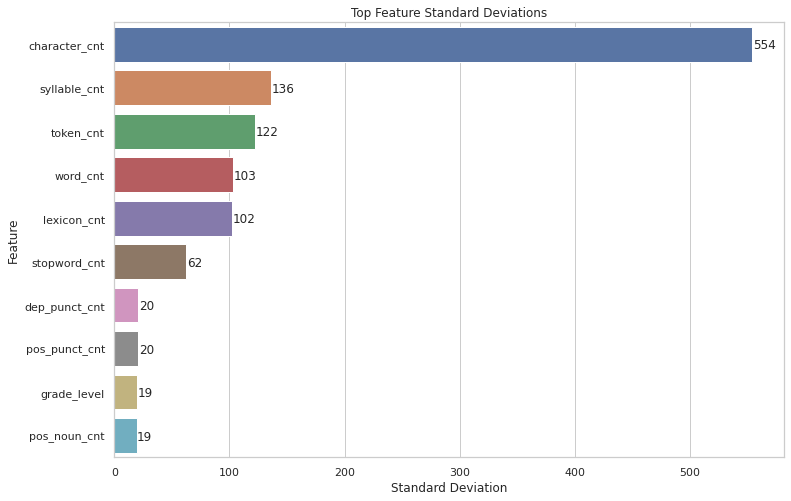

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=sorted_std[:10].values, y=sorted_std[:10].index, ax=ax)
ax.set_title("Top Feature Standard Deviations")
ax.set_ylabel("Feature")
ax.set_xlabel("Standard Deviation")
show_values_on_bars(ax)

In [21]:
sorted_std.iloc[-10:].index

Index(['dep_preconj_pct', 'ent_product_pct', 'ent_percent_pct',
       'ent_event_pct', 'ent_language_pct', 'dep_meta_pct', 'ent_law_pct',
       'dep_csubjpass_pct', 'pos_conj_cnt', 'pos_conj_pct'],
      dtype='object')

Text(0.5, 0, 'Standard Deviation')

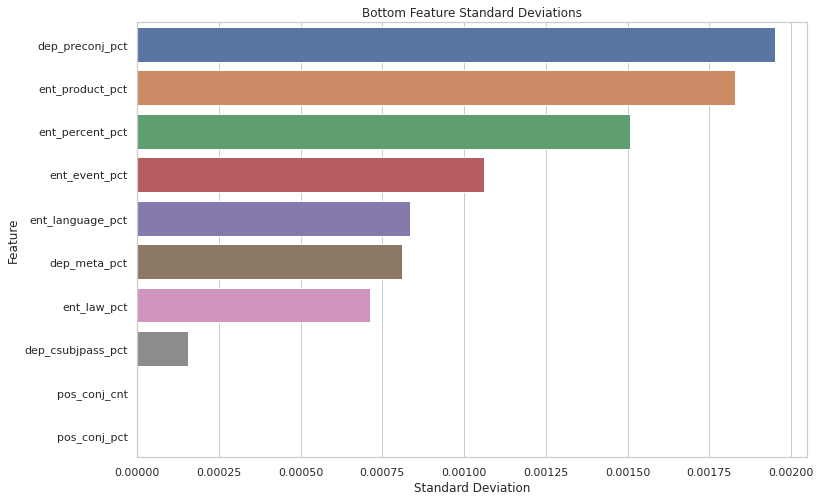

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=sorted_std.iloc[-10:].values, y=sorted_std.iloc[-10:].index, ax=ax)
ax.set_title("Bottom Feature Standard Deviations")
ax.set_ylabel("Feature")
ax.set_xlabel("Standard Deviation")
# show_values_on_bars(ax)

### ANOVA

In [23]:
anova_results = f_classif(X_train, y_train)
sorted_anova_f_stats = pd.Series(anova_results[0], index=X_train.columns).sort_values(ascending=False)
sorted_anova_f_stats

/home/jeff/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [34 35] are constant.
  UserWarning)
/home/jeff/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


svm_pred              1473.77762
ft_prob               1397.56806
nb_prob                792.12869
token_cnt              760.59228
character_cnt          748.73463
lexicon_cnt            747.73935
word_cnt               741.68200
stopword_cnt           731.74601
syllable_cnt           727.55999
pos_noun_cnt           710.31558
dep_prep_cnt           706.87489
dep_pobj_cnt           703.84596
pos_det_cnt            694.57970
pos_adp_cnt            682.47611
dep_root_cnt           673.36448
dep_nsubj_cnt          668.85490
pos_verb_cnt           648.90797
dep_det_cnt            647.35116
pos_aux_cnt            636.88615
dep_dobj_cnt           621.02870
pos_pron_cnt           613.26559
pos_adv_cnt            596.75707
dep_advmod_cnt         594.00216
pos_adj_cnt            576.90816
pos_sconj_cnt          572.76451
dep_aux_cnt            572.00357
dep_cc_cnt             539.95847
dep_amod_cnt           530.98782
pos_part_cnt           528.99363
dep_advcl_cnt          526.97377
ent_cnt   

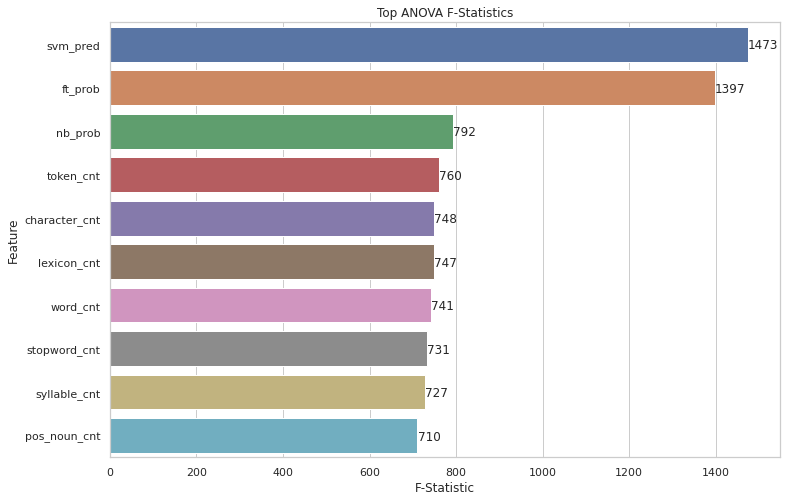

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=sorted_anova_f_stats.iloc[:10].values, y=sorted_anova_f_stats.iloc[:10].index, ax=ax)
ax.set_title("Top ANOVA F-Statistics")
ax.set_ylabel("Feature")
ax.set_xlabel("F-Statistic")
show_values_on_bars(ax)

### Mutual Info

In [25]:
mutual_info_results = mutual_info_classif(X_train, y_train)
sorted_mutual_info = pd.Series(mutual_info_results, index=X_train.columns).sort_values(ascending=False)
sorted_mutual_info

svm_pred              0.09521
ft_prob               0.06257
stopword_cnt          0.05489
word_cnt              0.05216
dep_punct_cnt         0.05069
character_cnt         0.04803
pos_noun_cnt          0.04769
lexicon_cnt           0.04663
pos_aux_cnt           0.04585
pos_adp_cnt           0.04448
lda_t1                0.04418
dep_nsubj_cnt         0.04385
pos_adv_cnt           0.04366
pos_punct_cnt         0.04359
pos_det_cnt           0.04342
dep_det_cnt           0.04291
token_cnt             0.04270
nb_prob               0.04230
pos_pron_cnt          0.04177
pos_verb_cnt          0.04158
dep_pobj_cnt          0.03983
dep_nsubj_pct         0.03860
pos_adj_pct           0.03851
dep_root_cnt          0.03836
pos_aux_pct           0.03831
dep_dobj_cnt          0.03669
uppercase_cnt         0.03653
lda_t5                0.03626
pos_adv_pct           0.03625
dep_dobj_pct          0.03585
dep_advcl_pct         0.03580
dep_attr_pct          0.03514
dep_mark_pct          0.03454
pos_part_p

Text(0.5, 0, 'Mutual Info')

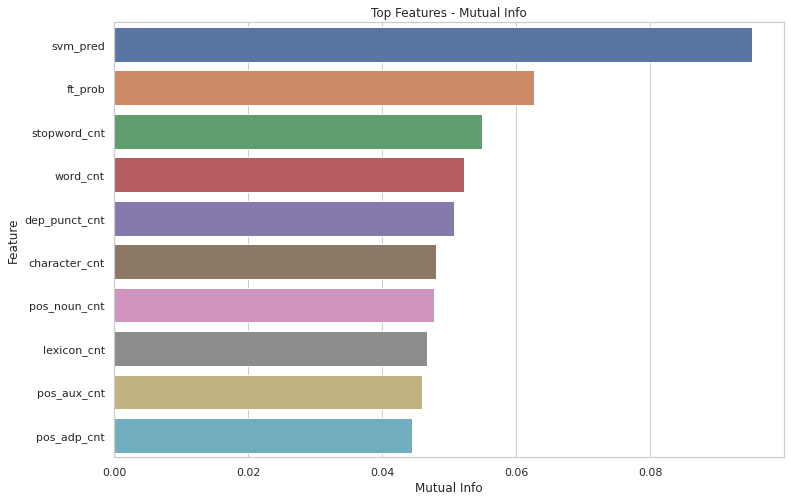

In [26]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=sorted_mutual_info.iloc[:10].values, y=sorted_mutual_info.iloc[:10].index, ax=ax)
ax.set_title("Top Features - Mutual Info")
ax.set_ylabel("Feature")
ax.set_xlabel("Mutual Info")
# show_values_on_bars(ax)

## Tree Based

### Feature Importances

In [27]:
forest = RandomForestClassifier(n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [28]:
feature_importances = pd.Series(forest.feature_importances_, index=X_train.columns)
feature_importances

review_stars          0.00457
nb_prob               0.02094
svm_pred              0.04404
ft_prob               0.03122
lda_t1                0.01127
lda_t2                0.01103
lda_t3                0.01142
lda_t4                0.01019
lda_t5                0.01125
grade_level           0.01116
polarity              0.01220
subjectivity          0.01078
word_cnt              0.01052
character_cnt         0.01570
num_cnt               0.00163
uppercase_cnt         0.00509
#@_cnt                0.00015
sentence_cnt          0.00509
lexicon_cnt           0.01065
syllable_cnt          0.01291
avg_word_len          0.01143
token_cnt             0.01403
stopword_cnt          0.01393
stopword_pct          0.01044
ent_cnt               0.00482
ent_pct               0.00893
pos_adj_pct           0.01052
pos_adj_cnt           0.00656
pos_adp_pct           0.01005
pos_adp_cnt           0.00917
pos_adv_pct           0.01005
pos_adv_cnt           0.00576
pos_aux_pct           0.00974
pos_aux_cn

In [29]:
sorted_fi = feature_importances.sort_values(ascending=False)
sorted_fi

svm_pred              0.04404
ft_prob               0.03122
nb_prob               0.02094
character_cnt         0.01570
token_cnt             0.01403
stopword_cnt          0.01393
syllable_cnt          0.01291
polarity              0.01220
avg_word_len          0.01143
lda_t3                0.01142
lda_t1                0.01127
lda_t5                0.01125
grade_level           0.01116
lda_t2                0.01103
dep_punct_cnt         0.01091
subjectivity          0.01078
pos_punct_cnt         0.01071
lexicon_cnt           0.01065
word_cnt              0.01052
pos_adj_pct           0.01052
pos_noun_pct          0.01049
stopword_pct          0.01044
dep_amod_pct          0.01036
pos_det_pct           0.01035
dep_punct_pct         0.01033
dep_det_pct           0.01022
dep_nsubj_pct         0.01020
pos_verb_pct          0.01020
dep_advmod_pct        0.01019
lda_t4                0.01019
dep_cc_pct            0.01018
dep_root_pct          0.01007
pos_adp_pct           0.01005
pos_adv_pc

Text(0.5, 0, 'Importance Score')

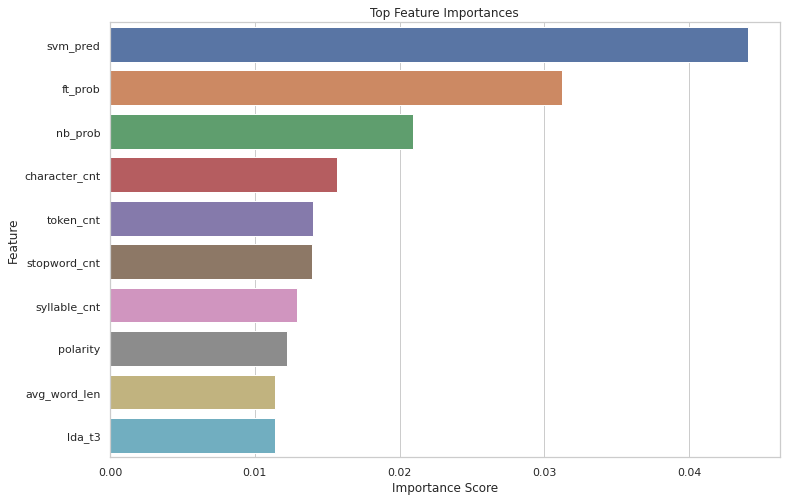

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=sorted_fi.iloc[:10].values, y=sorted_fi.iloc[:10].index, ax=ax)
ax.set_title("Top Feature Importances")
ax.set_ylabel("Feature")
ax.set_xlabel("Importance Score")

### Permutation Importances

In [31]:
pi_process = permutation_importance(forest, X_train, y_train, n_jobs=-1)

In [32]:
permutation_importances = pd.Series(pi_process.importances_mean, index=X_train.columns)
permutation_importances

review_stars          0.00004
nb_prob               0.00290
svm_pred              0.00366
ft_prob               0.00158
lda_t1                0.00004
lda_t2                0.00024
lda_t3                0.00004
lda_t4                0.00000
lda_t5                0.00000
grade_level           0.00000
polarity              0.00012
subjectivity          0.00000
word_cnt              0.00000
character_cnt         0.00006
num_cnt               0.00000
uppercase_cnt         0.00000
#@_cnt                0.00000
sentence_cnt          0.00000
lexicon_cnt           0.00000
syllable_cnt          0.00000
avg_word_len          0.00004
token_cnt             0.00000
stopword_cnt          0.00002
stopword_pct          0.00000
ent_cnt               0.00000
ent_pct               0.00002
pos_adj_pct           0.00000
pos_adj_cnt           0.00000
pos_adp_pct           0.00000
pos_adp_cnt           0.00000
pos_adv_pct           0.00000
pos_adv_cnt           0.00000
pos_aux_pct           0.00008
pos_aux_cn

In [33]:
sorted_pi = permutation_importances.sort_values(ascending=False)
sorted_pi

svm_pred              0.00366
nb_prob               0.00290
ft_prob               0.00158
lda_t2                0.00024
dep_acl_pct           0.00018
pos_verb_pct          0.00018
dep_cc_pct            0.00012
polarity              0.00012
pos_verb_cnt          0.00010
pos_noun_pct          0.00010
pos_aux_pct           0.00008
pos_punct_cnt         0.00006
dep_root_cnt          0.00006
character_cnt         0.00006
avg_word_len          0.00004
pos_propn_pct         0.00004
review_stars          0.00004
lda_t1                0.00004
lda_t3                0.00004
stopword_cnt          0.00002
ent_pct               0.00002
dep_poss_cnt          0.00000
dep_oprd_cnt          0.00000
dep_parataxis_pct     0.00000
dep_parataxis_cnt     0.00000
dep_pcomp_pct         0.00000
dep_pcomp_cnt         0.00000
dep_pobj_pct          0.00000
dep_pobj_cnt          0.00000
dep_poss_pct          0.00000
ent_person_pct        0.00000
dep_nummod_cnt        0.00000
dep_preconj_pct       0.00000
dep_precon

Text(0.5, 0, 'Importance Score')

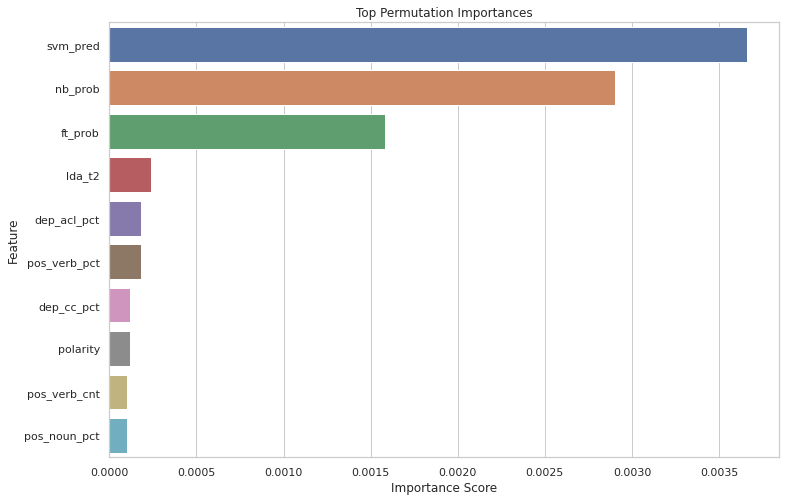

In [34]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x=sorted_pi.iloc[:10].values, y=sorted_pi.iloc[:10].index, ax=ax)
ax.set_title("Top Permutation Importances")
ax.set_ylabel("Feature")
ax.set_xlabel("Importance Score")